# Análisis de componentes principales

## Caso de uso: Automóviles Modelo  1985**

En este ejemplo, volveremos a nuestro conjunto de datos de automóviles y aplicaremos PCA, usándolo como una técnica descriptiva para descubrir características. Veremos otros casos de uso en el ejercicio.
Esta celda oculta carga los datos y define las funciones plot_variance y make_mi_scores.


## Objetivo

Predecir el precio de un automóvil a partir de las características del automóvil, como la marca, el body_style y la potencia usando el método de Análisis de componentes principales.

En este ejemplo, se clasificarán las características con Análisis de componentes principales y se revisarán los resultados mediante visualización de datos.

## Importación de las bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

## Definición de funciones conocidas para graficar y la obtención de mutual information

In [2]:
# Para graficar la varianza usando el PCA calculado
def plot_variance(pca, width=8, dpi=100):
    # Crear la figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Mostrar la varianza
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", title="% de la Varianza", ylim=(0.0, 1.0)
    )
    # Varianza Acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", title="% Varianza Acumulada", ylim=(0.0, 1.0)
    )
    # configura el gráfico
    fig.set(figwidth=8, dpi=100)
    return axs

In [3]:
# Para obtener la mutual information
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

## Extracción de datos

In [4]:
df = pd.read_csv("autos.csv")
df.head()

symboling         make fuel_type aspiration  num_of_doors   body_style  \
0          3  alfa-romero       gas        std             2  convertible   
1          3  alfa-romero       gas        std             2  convertible   
2          1  alfa-romero       gas        std             2    hatchback   
3          2         audi       gas        std             4        sedan   
4          2         audi       gas        std             4        sedan   

  drive_wheels engine_location  wheel_base  length  ...  engine_size  \
0          rwd           front        88.6   168.8  ...          130   
1          rwd           front        88.6   168.8  ...          130   
2          rwd           front        94.5   171.2  ...          152   
3          fwd           front        99.8   176.6  ...          109   
4          4wd           front        99.4   176.6  ...          136   

   fuel_system  bore stroke  compression_ratio  horsepower peak_rpm  city_mpg  \
0         mpfi  3.47   2.68                  9         111     5000        21   
1         mpfi  3.47   2.68                  9         111     5000        21   
2         mpfi  2.68   3.47                  9         154     5000        19   
3         mpfi  3.19   3.40                 10         102     5500        24   
4         mpfi  3.19   3.40                  8         115     5500        18   

   highway_mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450  

[5 rows x 25 columns]

Hemos seleccionado cuatro características que cubren una amplia gama de propiedades. Cada una de estas características también tiene una puntuación de Mutual Information alta con el objetivo, el precio. 

Estandarizaremos los datos ya que estas características no están naturalmente en la misma escala.


Selección unas características

In [5]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

### Separando características y las etiquetas

In [6]:
X = df.copy()
y = X.pop('price')

## Filtrando el dataset usando sólo las características de interés

In [7]:
X = X.loc[:, features]

## Estandarización

In [8]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

Ahora podemos ajustar el estimador PCA de scikit-learn  y crear los componentes principales. Puede ver aquí las primeras filas del conjunto de datos transformado.

## Obtención de los parámetros del análisis de los componentes principales PCA

In [9]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## Postprocesamiento

In [10]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4
0  0.382486 -0.400222  0.124122  0.169539
1  0.382486 -0.400222  0.124122  0.169539
2  1.550890 -0.107175  0.598361 -0.256081
3 -0.408859 -0.425947  0.243335  0.013920
4  1.132749 -0.814565 -0.202885  0.224138

La instancia PCA contiene las cargas (loadings) en su  atributo components_.

Se obtiene un dataframe con los loadings y las columnas de los datos.



In [11]:
loadings = pd.DataFrame(
    pca.components_.T,  # ajustamos los loadings
    columns=component_names,  # Las columnas con los componentes principales
    index=X.columns,  # Las filas son las originales características
)
loadings

PC1       PC2       PC3       PC4
highway_mpg -0.492347  0.770892  0.070142 -0.397996
engine_size  0.503859  0.626709  0.019960  0.594107
horsepower   0.500448  0.013788  0.731093 -0.463534
curb_weight  0.503262  0.113008 -0.678369 -0.523232

Los signos y magnitudes de los loading de un componente nos dicen qué tipo de variación se captura. 

El primer componente (PC1) muestra un contraste entre curb_weight y horsepower respecto a highway_mpg. 

Por ejemplo: los vehículos más pequeños y económicos pueden tener una buena relación kilometraje por cantidad de combustible. 

Se podría llamar a esto el eje "Lujo/Economía".



## Visualización

### Los componentes del PCA

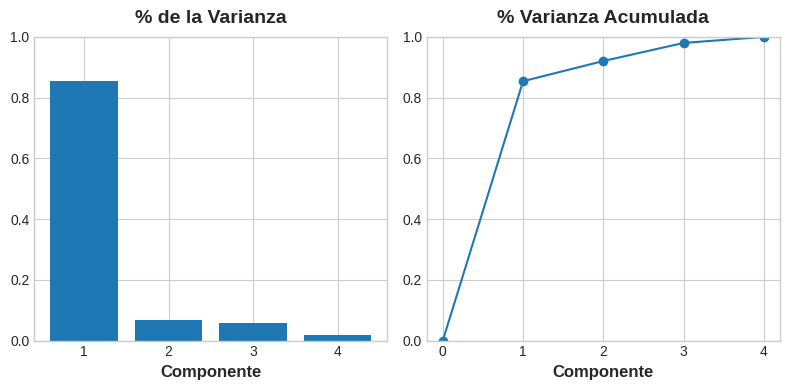

In [12]:
plot_variance(pca);

Veamos también las puntuaciones de MI de los componentes. No es sorprendente que PC1 sea altamente informativo, aunque los componentes restantes, a pesar de su pequeña variación, todavía tienen una relación significativa con el precio. Examinar esos componentes podría valer la pena para encontrar relaciones no capturadas por el eje principal Lujo/Economía.



In [13]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.014110
PC2    0.379520
PC3    0.306797
PC4    0.204758
Name: MI Scores, dtype: float64

El tercer componente muestra un contraste entre la horsepower y la curb_weight: autos deportivos vs. vagones, parece.

Text(0, 0.5, 'Componentes')

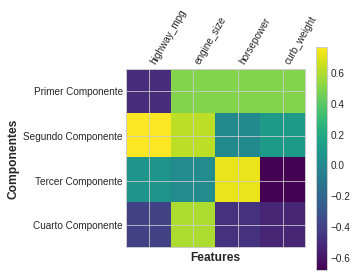

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3], ["Primer Componente", "Segundo Componente", "Tercer Componente", "Cuarto Componente"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Componentes")

In [14]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

make   body_style  horsepower  curb_weight
118        porsche      hardtop         207         2756
117        porsche      hardtop         207         2756
119        porsche  convertible         207         2800
45          jaguar        sedan         262         3950
96          nissan    hatchback         200         3139
..             ...          ...         ...          ...
59   mercedes-benz        wagon         123         3750
61   mercedes-benz        sedan         123         3770
101         peugot        wagon          95         3430
105         peugot        wagon          95         3485
143         toyota        wagon          62         3110

[193 rows x 4 columns]

Para expresar este contraste, vamos a crear una nueva función de relación:

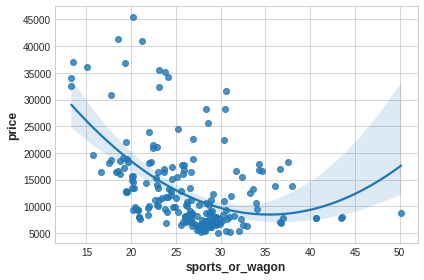

In [15]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);